Getting Raster Information with Python

In [39]:
import os
os.chdir(r'D:\Resume\sentinel')

In [40]:
!gdalinfo -nomd LT05_L1TP_146040_20000219_20200907_02_T1

ERROR 4: LT05_L1TP_146040_20000219_20200907_02_T1: No such file or directory
gdalinfo failed - unable to open 'LT05_L1TP_146040_20000219_20200907_02_T1'.


In [41]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

In [42]:
file_name=r'compoiste_sen.tif'

In [43]:
ds = gdal.Open(file_name)
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002D374011930> >

In [44]:
print('File list:', ds.GetFileList())

File list: ['compoiste_sen.tif', 'compoiste_sen.aux', 'compoiste_sen.rrd']


In [45]:
print('Width:', ds.RasterXSize)

Width: 10980


In [46]:
print('Height', ds.RasterYSize)

Height 10980


In [47]:
print('Coordinate system', ds.GetProjection())

Coordinate system PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["meters",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


Transformation Information

In [48]:
gt = ds.GetGeoTransform()

In [49]:
gt

(300000.0, 10.0, 0.0, 2300040.0, 0.0, -10.0)

In [50]:
print('Origin:', (gt[0],gt[3]))
print('Pixel size:', (gt[1],gt[5]))

Origin: (300000.0, 2300040.0)
Pixel size: (10.0, -10.0)


Geo Transaformation

In [51]:
print('Upper Left Corner:', gdal.ApplyGeoTransform(gt,0,0))
print('Upper Right Corner:', gdal.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('Lower Left Corner:', gdal.ApplyGeoTransform(gt,0,ds.RasterYSize))
print('Lower Right Corner:', gdal.ApplyGeoTransform(gt,ds.RasterXSize,ds.RasterYSize))
print('Center:', gdal.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))      

Upper Left Corner: [300000.0, 2300040.0]
Upper Right Corner: [409800.0, 2300040.0]
Lower Left Corner: [300000.0, 2190240.0]
Lower Right Corner: [409800.0, 2190240.0]
Center: [354900.0, 2245140.0]


In [52]:
print('Metdata:', ds.GetMetadata())

Metdata: {'AREA_OR_POINT': 'Area', 'TIFFTAG_MAXSAMPLEVALUE': '25648', 'TIFFTAG_MINSAMPLEVALUE': '1', 'TIFFTAG_RESOLUTIONUNIT': '1 (unitless)', 'TIFFTAG_SOFTWARE': 'IMAGINE TIFF Support\nCopyright 1991 - 1999 by ERDAS, Inc. All Rights Reserved\n@(#)$RCSfile: etif.c $ $Revision: 1.10.1.9.1.9.2.11 $ $Date: 2004/09/15 18:42:01EDT $', 'TIFFTAG_XRESOLUTION': '1', 'TIFFTAG_YRESOLUTION': '1'}


In [53]:
print('Image Structure Metadata:', ds.GetMetadata('IMAGE_STRUCTURE'))

Image Structure Metadata: {'COMPRESSION': 'PACKBITS', 'INTERLEAVE': 'PIXEL'}


Number of Bands

In [54]:
print('Number of Bands:', ds.RasterCount)

Number of Bands: 4


Loop to find band number

In [60]:
for i in range(1, ds.RasterCount+1):
    band = ds.GetRasterBand(i) # in GDAL, band are indexed starting as 1!
    interp = band.GetColorInterpretation()
    interp_name = gdal.GetColorInterpretationName(interp)
    (w,h)=band.GetBlockSize()
    print('Band {0:d}, block size {1:d} {2:d}, color interp {3:s}',format(i,w,h,interp_name))
    ovr_count = band.GetOverviewCount()
    for j in range(ovr_count):
        ovr_band = band.GetOverview(j) # but overview band starting at 0
        print(' Overview %d: %d%d'%(j,ovr_band.XSize, ovr_band.YSize))

TypeError: format expected at most 2 arguments, got 4

In [61]:
del ds

Calculate band Min, Max, Mean, Standard Deviation

In [67]:
ds = gdal.Open(file_name)

In [69]:
for i in range(1,ds.RasterCount+1):
    band = ds.GetRasterBand(i)
    (minimum, maximum, mean, stddev) = band.ComputeStatistics(False)
    print('Band{:d}, min={:.3f}, max{:.3f}, mean{:.3f}, stddev{:.3f}'.format(i, minimum, maximum, mean, stddev))

Band1, min=1.000, max25648.000, mean687.299, stddev224.022
Band2, min=184.000, max24096.000, mean949.603, stddev296.432
Band3, min=74.000, max21568.000, mean937.494, stddev480.557
Band4, min=0.000, max18912.000, mean2490.780, stddev611.974


Extarct data of first band

In [70]:
band=ds.GetRasterBand(1)

Get the pixel intensity associated with band

In [71]:
data=band.ReadAsArray()

In [72]:
data

array([[ 965,  955,  885, ...,  814,  797,  820],
       [ 902,  943,  940, ...,  821,  791,  758],
       [ 929,  971,  943, ...,  832,  870,  879],
       ...,
       [ 464,  482,  566, ...,  998, 1023, 1100],
       [ 464,  501,  546, ...,  976,  941,  846],
       [ 475,  518,  492, ...,  862,  924,  858]], dtype=uint16)

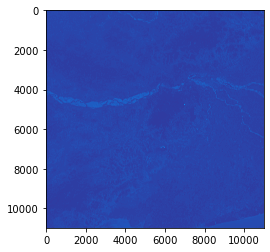

In [76]:
plt.imshow(data,cmap='terrain')

Reading Partial Data set

In [81]:
data=band.ReadAsArray(xoff=600,yoff=600,win_xsize=512,win_ysize=512)

In [85]:
band.ReadAsArray()

array([[ 965,  955,  885, ...,  814,  797,  820],
       [ 902,  943,  940, ...,  821,  791,  758],
       [ 929,  971,  943, ...,  832,  870,  879],
       ...,
       [ 464,  482,  566, ...,  998, 1023, 1100],
       [ 464,  501,  546, ...,  976,  941,  846],
       [ 475,  518,  492, ...,  862,  924,  858]], dtype=uint16)

Subset Image

In [86]:
data.shape

(512, 512)

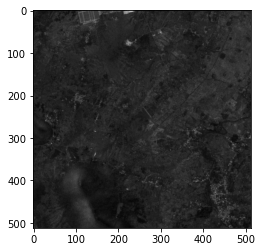

In [87]:
plt.imshow(data,cmap='gray') 

In [88]:
del data
del ds

In [89]:
ds = gdal.Open(file_name)

In [90]:
band=ds.GetRasterBand(1)

In [91]:
x_size=ds.RasterXSize
y_size=ds.RasterYSize

In [92]:
print(x_size,y_size)

10980 10980


In [94]:
block_size_x,block_size_y=band.GetBlockSize()

In [95]:
print(block_size_x,block_size_y)

512 512


Read entire image block wise by swtiching one another

In [100]:
for x in range(0,x_size,block_size_x):
    if x+block_size_x < x_size:
        columns=block_size_x
    else:
        columns=x_size-x
    for y in range(0,y_size,block_size_y):
        if y+block_size_y < y_size:
            rows=block_size_y
        else:
            rows=y_size-y
    data=band.ReadAsArray(x,y,columns,rows)
    data=data*5

In [101]:
print(data)

[[4795 5105 5300 ... 4900 5045 4635]
 [5015 5015 5240 ... 4810 4840 4455]
 [5200 5160 5060 ... 4650 4240 4535]
 ...
 [4555 4260 4495 ... 4990 5115 5500]
 [3985 4125 4205 ... 4880 4705 4230]
 [3950 4495 4560 ... 4310 4620 4290]]


Writing a Single Band Raster Create copy Method

In [117]:
src_file=r'composite_sen.tif'
dst_filename=r'op_raster.tif'
src_ds = gdal.Open(src_file)

In [118]:
driver=gdal.GetDriverByName('GTiff')
driver

<osgeo.gdal.Driver; proxy of <Swig Object of type 'GDALDriverShadow *' at 0x000002D3587D9480> >

In [119]:
dst_ds = driver.CreateCopy(dst_filename,src_ds)

ValueError: Received a NULL pointer.

In [120]:
data=src_ds.ReadAsArray()

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

In [121]:
data

64268.70586570922

In [122]:
data=np.invert(data)

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [123]:
data

64268.70586570922

In [124]:
data=np.mean(data)
data

64268.70586570922

TypeError: Invalid shape () for image data

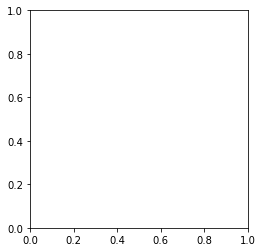

In [125]:
plt.imshow(data,cmap='gray')

In [126]:
out_band=dst_ds.GetRasterBand(1)

In [127]:
out_band.WriteArray(data)

ValueError: expected array of dim 2

In [128]:
del out_band

In [ ]:
Single Raster Create Method

In [129]:
src_txt_file='cover_letter.txt'

In [130]:
dst_filename='op_raster22.tif'

In [131]:
driver=gdal.GetDriverByName('gtiff')

In [134]:
dst_ds = driver.Create(dst_filename,xsize=73,yaxis=71,bands=1,
                      eType=gdal.GDT_Int16)

TypeError: Driver_Create() missing required argument 'ysize' (pos 4)

In [135]:
from osgeo import osr # craete spatial refrence system

In [136]:
crs=osr.SpatialReference()
crs.SetWellKnownGeogCS('WGS84')

0

In [138]:
crs.ExportToWkt()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [139]:
trf=[-180,5,0,87.5,0,-2.5]

In [140]:
dst_ds.SetProjection(crs.ExportToWkt())
dst_ds.SetGeoTransform(trf)

0

In [141]:
data=np.loadtxt(src_txt_file,delimiter=',',dtype=np.int16)

OSError: cover_letter.txt not found.

In [157]:
import os
os.chdir(r'D:\Resume\data1')

In [174]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

Stacking Raster Bands

In [175]:
file_name=['L3-NF45T10-106-058-01Jan19-BAND4.tif',
           'L3-NF45T10-106-058-01Jan19-BAND3.tif',
           'L3-NF45T10-106-058-01Jan19-BAND2.tif']

In [176]:
img_data=list()
for file in file_name:
    ds=gdal.Open(file)
    data=ds.ReadAsArray()
    img_data.append(data)
print(img_data)

[array([[151, 141, 158, ..., 132, 127, 128],
       [160, 149, 156, ..., 147, 130, 124],
       [159, 150, 139, ..., 170, 143, 143],
       ...,
       [186, 178, 176, ..., 170, 137, 121],
       [194, 178, 178, ..., 173, 131, 121],
       [187, 183, 184, ..., 158, 137, 131]], dtype=uint16), array([[77, 75, 77, ..., 71, 72, 70],
       [81, 79, 74, ..., 66, 75, 78],
       [77, 76, 74, ..., 64, 69, 70],
       ...,
       [46, 46, 46, ..., 59, 70, 78],
       [47, 45, 46, ..., 60, 68, 75],
       [46, 44, 45, ..., 62, 63, 64]], dtype=uint16), array([[ 97,  97,  98, ...,  89,  87,  87],
       [100,  98,  98, ...,  88,  92,  91],
       [ 98,  96,  94, ...,  89,  93,  91],
       ...,
       [ 76,  75,  73, ...,  86,  88,  92],
       [ 77,  75,  75, ...,  88,  90,  90],
       [ 75,  74,  74, ...,  89,  88,  86]], dtype=uint16)]


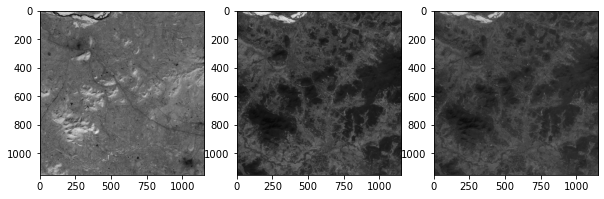

In [177]:
fig=plt.figure(figsize=(10,15))
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.imshow(img_data[i-1],cmap='gray')

Composite of bands

In [178]:
dst_file='L3-NF45T10-106-058-01Jan19-BAND4_RBG.TIF'
height,widt=img_data[0].shape # Same size image

In [181]:
def scaleMinMax(x):
    return((x - np.nanmin(x))/(np.nanmax(x) - np.nanmin(x)))
ds = gdal.Open("D:\Resume\sentinel\compoiste_sen.tif")
r = ds.GetRasterBand(4).ReadAsArray()
g = ds.GetRasterBand(3).ReadAsArray()
b = ds.GetRasterBand(2).ReadAsArray()

ds = None

r = scaleMinMax(r)
g = scaleMinMax(g)
b = scaleMinMax(b)
rgbStd = np.dstack((rStd,gStd,bStd))
plt.figure()
plt.imshow(rgbStd)
plt.show()

MemoryError: Unable to allocate 920. MiB for an array with shape (10980, 10980) and data type float64

In [164]:
for i in range(1,4):
    band=dst_ds.GetRasterBand(i)
    band.WriteArray(img_data[i-1])

In [165]:
dst_ds.FlushCache()

In [166]:
dst_ds=None

In [167]:
ds=gdal.Open(dst_file)

In [168]:
data=ds.ReadAsArray(buf_type=gdal.GDT_Byte)

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

MemoryError: Unable to allocate 690. MiB for an array with shape (10980, 10980, 3) and data type uint16

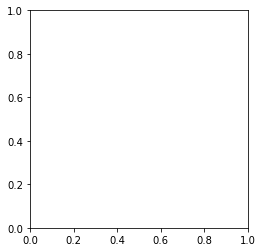

In [182]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
def scaleMinMax(x):
    return((x - np.nanmin(x))/(np.nanmax(x) - np.nanmin(x)))

 
ds = gdal.Open("D:\Resume\sentinel\compoiste_sen.tif")
 
r = ds.GetRasterBand(4).ReadAsArray()
g = ds.GetRasterBand(3).ReadAsArray()
b = ds.GetRasterBand(2).ReadAsArray()

ds = None

rgb = np.dstack((r,g,b))
plt.figure()
plt.imshow(rgb)
plt.show()